# Weather a Person getting a Loan or Not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("D:\\Data science\\DATA SETS\\Datasets by srk sir\\LoanData.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.drop(["Loan_ID"],axis=1, inplace=True)

In [5]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [6]:
df["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [7]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [8]:
df["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [9]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [10]:
df["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [11]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [12]:
df["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [13]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
df["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [15]:
df["ApplicantIncome"].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [16]:
df["CoapplicantIncome"].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [17]:
df["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [18]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [19]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [20]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [21]:
df["Credit_History"]=df["Credit_History"].replace({1.:"Good",0.:"Bad"})

In [22]:
df["Credit_History"].value_counts()

Credit_History
Good    475
Bad      89
Name: count, dtype: int64

In [23]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [24]:
df["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [25]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [26]:
df["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [27]:
continuous=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
d_categorical=["Gender","Married","Education","Self_Employed","Credit_History","Property_Area","Loan_Status"]
d_count=["Dependents","Loan_Amount_Term"]

# EDA (Exploratory Data Analysis)
### For continuousdata

In [28]:
df[continuous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


In [29]:
df[continuous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

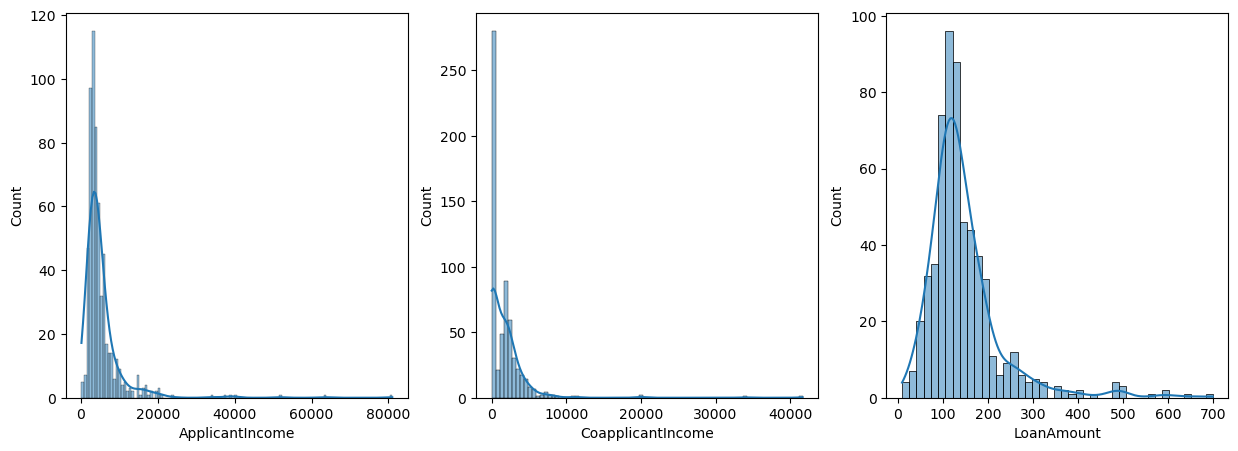

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(df["ApplicantIncome"],kde=True)

plt.subplot(1,3,2)
sns.histplot(df["CoapplicantIncome"],kde=True)

plt.subplot(1,3,3)
sns.histplot(df["LoanAmount"],kde=True)
plt.show()

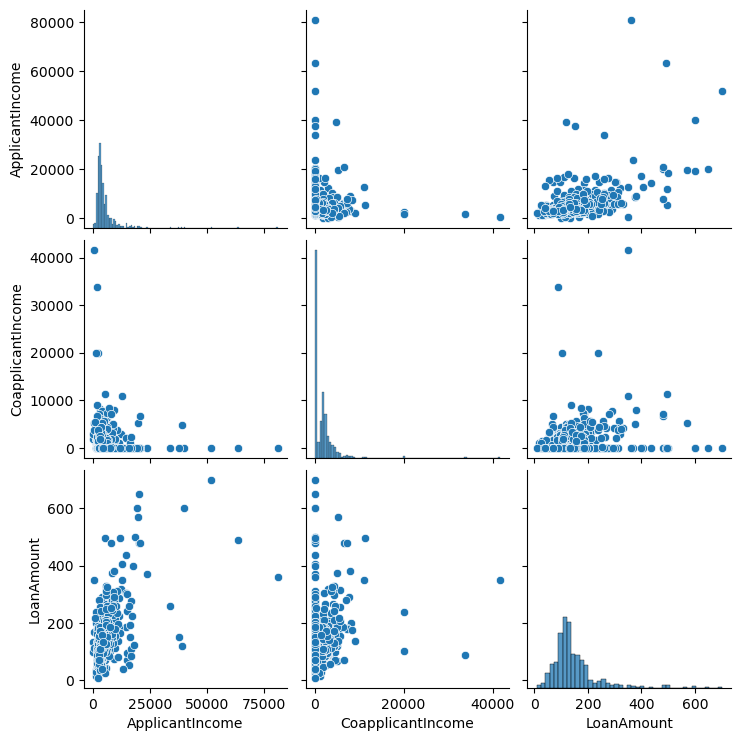

In [31]:
sns.pairplot(df[continuous])
plt.show()

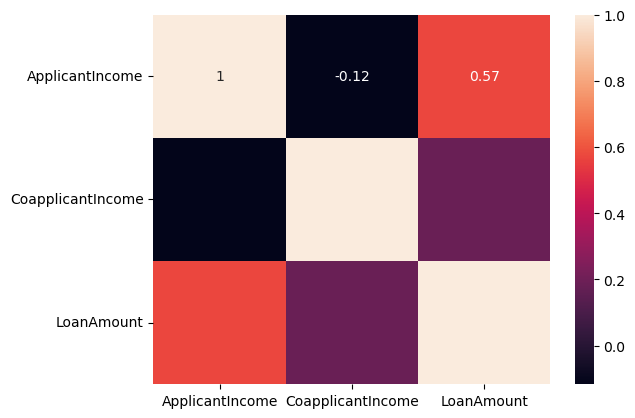

In [32]:
sns.heatmap(df[continuous].corr(),annot=True)
plt.show()

In [33]:
# Visualize the outliers

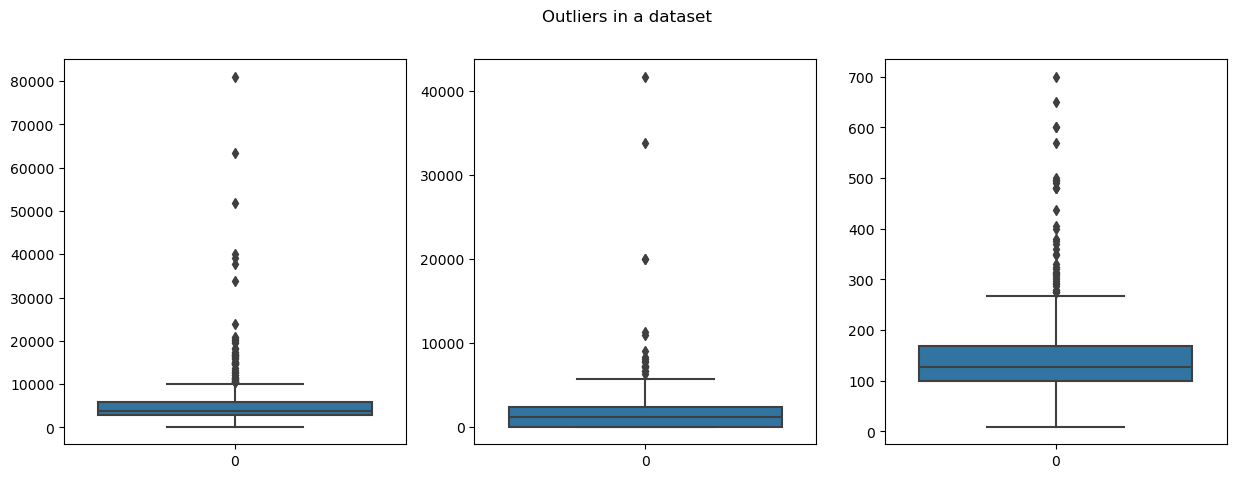

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(df["ApplicantIncome"])

plt.subplot(1,3,2)
sns.boxplot(df["CoapplicantIncome"])

plt.subplot(1,3,3)
sns.boxplot(df["LoanAmount"])

plt.suptitle("Outliers in a dataset")
plt.show()

### For Descretedata

In [35]:
df[d_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,Good,Semiurban,Y
freq,489,398,480,500,475,233,422


# Data Preparation

In [36]:
df["Income"]=df["ApplicantIncome"]+df["CoapplicantIncome"]

In [37]:
df.drop(["ApplicantIncome","CoapplicantIncome"],axis=1,inplace=True)

# Data cleaning

### Modifying wrong data

In [38]:
df["Dependents"]=df["Dependents"].replace({"3+":3})

### Missing Values

In [39]:
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [40]:
df.isnull().sum()/len(df)*100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
Income              0.000000
dtype: float64

In [41]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [42]:
df["Dependents"]=df["Dependents"].fillna(0)

In [43]:
df=df.dropna(subset=["Credit_History","Loan_Amount_Term","LoanAmount"])

### Modifying wrong DataTypes

In [44]:
df["Dependents"]=df["Dependents"].astype(int)
df["LoanAmount"]=df["LoanAmount"].astype(int)
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].astype(int)

In [45]:
df["Credit_History"].unique()

array(['Good', 'Bad'], dtype=object)

### Duplicates

In [46]:
df.duplicated().sum()

0

# Outliers

In [47]:
# For this Dataset outliers should be retrain

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529 entries, 1 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            529 non-null    object 
 1   Married           529 non-null    object 
 2   Dependents        529 non-null    int32  
 3   Education         529 non-null    object 
 4   Self_Employed     529 non-null    object 
 5   LoanAmount        529 non-null    int32  
 6   Loan_Amount_Term  529 non-null    int32  
 7   Credit_History    529 non-null    object 
 8   Property_Area     529 non-null    object 
 9   Loan_Status       529 non-null    object 
 10  Income            529 non-null    float64
dtypes: float64(1), int32(3), object(7)
memory usage: 43.4+ KB


# Data Encoding

In [49]:
df["Gender"]=df["Gender"].replace({"Male":1,"Female":0})
df["Married"]=df["Married"].replace({"Yes":1,"No":0})
df["Education"]=df["Education"].replace({"Graduate":1,"Not Graduate":0})
df["Self_Employed"]=df["Self_Employed"].replace({"Yes":1,"No":0})
df["Property_Area"]=df["Property_Area"].replace({"Rural":0,"Semiurban":1,"Urban":2})
df["Credit_History"]=df["Credit_History"].replace({"Good":1,"Bad":0})
df["Loan_Status"]=df["Loan_Status"].replace({"Y":1,"N":0})

### Transformation

In [50]:
df[["Income","LoanAmount"]].skew()

Income        5.777628
LoanAmount    2.607945
dtype: float64

In [51]:
from scipy.stats import boxcox
df["Income"],a=boxcox(df["Income"])
df["Income"].skew()

-0.02776906884678578

In [52]:
log=np.log(df["Income"])
log.skew()

-0.03777978465106224

In [53]:
root=((df["Income"])**(1/2))
root.skew()

-0.03277183201955104

In [54]:
log=np.log(df["LoanAmount"])
log.skew()

-0.29685462753392344

In [55]:
Root=(df["LoanAmount"])**(1/11)
Root.skew()

0.009156056085302167

In [56]:
df["LoanAmount"],b=boxcox(df["LoanAmount"])
df["LoanAmount"].skew()

0.03828914734568106

In [57]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"]/12

# X and y

In [58]:
X=df.drop(["Loan_Status"],axis=1)
y=df["Loan_Status"]

### Identifying Best Random State Number

In [59]:
train=[]
test=[]
cv=[]
for i in range(0,101):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=i)
    
    from sklearn.linear_model import LogisticRegression
    modelL=LogisticRegression()
    modelL.fit(X_train,y_train)
    
    ypred_train=modelL.predict(X_train)
    ypred_test=modelL.predict(X_test)
    
    from sklearn.metrics import accuracy_score
    train.append(accuracy_score(y_train,ypred_train))
    test.append(accuracy_score(y_test,ypred_test))
    
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(modelL,X_train,y_train,cv=5,scoring = 'accuracy').mean())
    
em=pd.DataFrame({"Train":train,"Test":test,"CV":cv})
gm=em[(abs(em["Train"]-em["Test"])<=0.05) & (abs(em["Test"]-em["CV"])<=0.05)]
rs=gm[gm["CV"]==gm["CV"].max()].index.to_list()[0]
print("Best Randomstate number:",rs)

Best Randomstate number: 70


## Train_test_split

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=70)

# Mechine Learning Modelling and evaluation

### Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
estimator_dt=DecisionTreeClassifier(random_state=70)
param_grid_dt={"criterion":["gini","entropy"],"max_depth":list(range(1,30))}
dt_hp=GridSearchCV(estimator_dt,param_grid_dt,cv=5,scoring="accuracy")
dt_hp.fit(X_train,y_train)
print(dt_hp.best_params_)

f_imp_dt=pd.DataFrame(data=dt_hp.best_estimator_.feature_importances_,index=X.columns,columns=["Feature_imp"])
dt_imp_f=f_imp_dt[f_imp_dt["Feature_imp"]>0].index.to_list()
dt_imp_f

{'criterion': 'gini', 'max_depth': 1}


['Credit_History']

In [69]:
X_imp_dt=X[dt_imp_f]
X_traind,X_testd,y_traind,y_testd=train_test_split(X_imp_dt,y,train_size=0.8,random_state=70)

dt=DecisionTreeClassifier(criterion="gini",max_depth=1,random_state=70)
dt.fit(X_traind,y_traind)

ypred_train_dt=dt.predict(X_traind)
ypred_test_dt=dt.predict(X_testd)

from sklearn.metrics import accuracy_score
print("Train accuracy:",accuracy_score(y_traind,ypred_train_dt))
print("Test accuracy:",accuracy_score(y_testd,ypred_test_dt))

from sklearn.model_selection import cross_val_score
print("cv:",(cross_val_score(dt,X_traind,y_traind,cv=5).mean()))

Train accuracy: 0.8226950354609929
Test accuracy: 0.7830188679245284
cv: 0.8227731092436976
